# Supervised Machine Learning model Deployment for Single-Nucleotide Polymorphisms (SNP) data in Patients with Colorectal Cancer (CRC)

*Date : 19/12/2022*

---

## Introduction

Colorectal cancer (CRC) is caused by uncontrolled proliferation of colon and rectum cells and is one of the principal causes of death in the world. However, an early diagnosis can increase survival rates, as prompt treatment can lead to a full recovery (Mármol et al., 2017). It is also known that individuals affected by this disease response differently to the treatment depending on their genetic information (Fagny et al., 2020). Particularly, one of the most useful type of genetic variation for disease detection reported are Single-Nucleotide Polymorphisms (SNP), or changes in a single nucleotide that are rare variants in the population (Vignal et al., 2002). 


**Description of the project :** In this way, the objective of the present work is implementing, deploying and comparing supervised machine learning models to develop a classifier that will distinguish if an patient with Colorectal cancer (CRC) will have a good (R) or inexistent (NR) response to treatment based on its Single-Nucleotide polymorphism (SNP) information.

---
## INDEX OF CONTENTS
---

1. **Data preparation and analysis**--> [link interno 1](#DataPrep)
    1. **Exploratory Data Analysis**
    2. **Data Preprocessing**
    3. **Data Splitting** - Train-Test


3. **Model training**--> [link interno 2](#ML)

    --> Cross-validation and hyperparameter tuning
    1. **KNN Classifier**
    2. **Decision Tree Classifier**
    3. **Random Tree Classifier**
    4. **MLP classifier**
    5. **Logistic Regression**
    6. **Ridge Regression.**
    ---
     
    
3. **Model assessment**--> [link interno 3](#Results)
4. **Conclusion**--> [link interno 4](#Conclusion)
5. **References**

### Libraries importation

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython import display

# fixing random seed for all models
np.random.seed(8)

<a id='#DataPrep'></a>

---

# 1. Data preparation and analysis

#### Dataset import

In [2]:
df = pd.read_csv("dataset9.csv")
df = df[df.columns[1:]]

#### Dataset description

The present work will use data from different individuals that have been diagnosed with rectal colon cancer containing encoded information describing their SNP mutation (M) and non mutation (W) in both chromosomal pairs for 21 different genome locus associated to each SNP ('WW' encoded as 0 ,'WM' as 1, 'MW' as 2, 'MM' as 3), and the categorization of them based on its good response (R) or bad response to the treatment (NR), present in the `Target` column. 

This is a glimpse of the dataset.


In [3]:
df.head()

,Target,n_rs3188513,n_rs9960669,n_rs2602,n_rs5445365,n_rs133061,n_rs10102851,n_rs8375668,n_rs3015353,n_rs3229523,...,n_rs9280789,n_rs2515462,n_rs9025039,n_rs94282819,n_rs344903,n_rs0370,n_rs9072249,n_rs0220,n_rs833068,n_rs933069
0,R,0,2,0,1,1,2,1,1,0,...,2,0,0,1,0,2,2,0,2,2
1,R,0,2,1,2,0,0,1,0,0,...,2,1,0,1,2,0,1,0,0,1
2,R,0,2,0,1,0,2,0,1,1,...,2,1,0,2,1,1,0,1,0,0
3,R,0,2,2,1,0,0,1,0,1,...,0,0,2,0,2,0,2,0,1,1
4,R,0,0,2,0,1,2,1,1,1,...,1,0,0,2,2,2,1,1,1,1


In this way it contains 53 individuals (rows), 21 features (associated to different SNPs), and one label (22 columns)

In [4]:
df.shape

(53, 22)

## 1.1. Exploratory Data Analysis
    In this stage we will focus on analyzing and visualizing data to decide how to divide it and process it for training

**Check if there are missing values**

In [5]:
df.isnull().sum()

Target          0
n_rs3188513     0
n_rs9960669     0
n_rs2602        0
n_rs5445365     0
n_rs133061      0
n_rs10102851    0
n_rs8375668     0
n_rs3015353     0
n_rs3229523     0
n_rs6236416     0
n_rs5274755     0
n_rs9280789     0
n_rs2515462     0
n_rs9025039     0
n_rs94282819    0
n_rs344903      0
n_rs0370        0
n_rs9072249     0
n_rs0220        0
n_rs833068      0
n_rs933069      0
dtype: int64

No missing values were found

**Check categorical type frequencies**

In [6]:
# Label frequency data
print('Label frequency data')
print(df['Target'].value_counts())


Label frequency data
R     30
NR    23
Name: Target, dtype: int64


There is an overrepresented label (corresponding to Responsive patients R). However, there is not noticeable misbalance between the qualitative types that would affect the data distribution for training, as the frequencies are somewhat simmilar.

In [7]:
# SNP descriptor type frequency data
df[df.columns[1:]].apply(pd.Series.value_counts).style.background_gradient(cmap ='PuBu', axis=1)

,n_rs3188513,n_rs9960669,n_rs2602,n_rs5445365,n_rs133061,n_rs10102851,n_rs8375668,n_rs3015353,n_rs3229523,n_rs6236416,n_rs5274755,n_rs9280789,n_rs2515462,n_rs9025039,n_rs94282819,n_rs344903,n_rs0370,n_rs9072249,n_rs0220,n_rs833068,n_rs933069
0,27.000000,9.000000,12.000000,10.000000,22.000000,10.000000,28.000000,21,29.000000,7.000000,12,17.000000,28.000000,10.000000,5.000000,6,5.000000,12.000000,26,15.000000,11.000000
1,14.000000,8.000000,16.000000,14.000000,18.000000,4.000000,17.000000,20,19.000000,8.000000,8,8.000000,14.000000,8.000000,11.000000,11,15.000000,24.000000,13,20.000000,22.000000
2,12.000000,36.000000,25.000000,29.000000,13.000000,39.000000,8.000000,11,5.000000,38.000000,32,28.000000,11.000000,35.000000,37.000000,35,33.000000,17.000000,13,18.000000,20.000000
3,nan,nan,nan,nan,nan,nan,nan,1,nan,nan,1,nan,nan,nan,nan,1,nan,nan,1,nan,nan


It is important to note that each gene locus can have different SNP overrepresented types associated to it. The least represented type is the encoded (3) value with a total of 4 values in the dataset. *These values correspond to **MM** SNP types, which are types that have homozigous mutations and can be more detrimental to patients, thereby being underrepresented*

#### Prior visualization of SNPs per label group

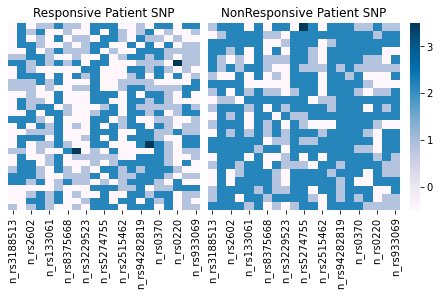

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=True)


sns.heatmap(df[df['Target'] == 'R'][df.columns[1:]], cbar=False, yticklabels=[], ax=ax1, cmap='PuBu')
ax1.set_title("Responsive Patient SNP")


sns.heatmap(df[df['Target'] == 'NR'][df.columns[1:]], yticklabels=[], ax=ax2, cmap='PuBu')
ax2.set_title("NonResponsive Patient SNP")

#Get the colorbar object from the Seaborn heatmap
colorbar = ax2.collections[0].colorbar
# The list comprehension calculates the positions to place the labels to be evenly distributed across the colorbar
r = colorbar.vmax 
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (4) + r * i / (4) for i in range(4)])
colorbar.set_ticklabels([0,1,2,3])

plt.show()

Intuitively, it seems that just as expected, generally mutation SNP types will more represented in Non-Responsive CRC patients.

#### Correlation visualization

We do not have information about the position of the SNPs in the genome, but it is known that the closer the mutation locus are from one another, the more correlated the polymorphisms will be with each other.

In this way, performing correlation analysis and visualizing it per SNP column will be insightfull if it proves to be informative and we leverage this information for training

<AxesSubplot:>

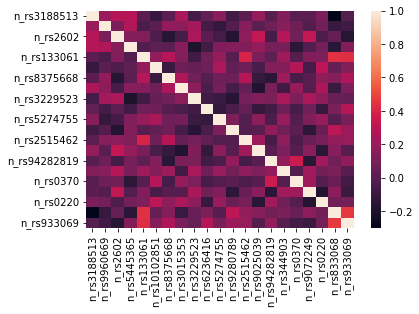

In [9]:
sns.heatmap(df[df.columns[1:]].corr())

It seems that correlation is not extensively present among different SNP in the dataset, so no feature selection process or correlation information will be leveraged for training. In spite of this, there can be underlying correlation patterns that affect the data structure but are unnoticeable.

## 1.2. Data preprocessing
    In this stage we will focus on encoding and reformating the data present in the pandas `DataFrame` to make it leveragable for the training process
    
This implies preprocessing data in two ways:
1. The **label `Target`** conforms two qualitative types that can be encoded as a binary variable. Calling `le.classes_` returns the order of the qualitative types used to encode them into `0` and `1` classes, respectively
2. The **SNP encoded data** has a simple numerical encoding that can however bias the training, as it will not treat all categorical variables equally for training. This is because it will take different distances from their numerical values per categorical type. In this case a `OneHotEncoding` is more suitable for analysis, and can be achieved with `get_dummies` pandas function specific to each columns

In [10]:
X = df.drop('Target', axis=1)
X = pd.get_dummies(X, drop_first=True, columns=X.columns)
X=X.to_numpy()

In [11]:
y = df['Target'].to_numpy()
le = LabelEncoder()
y = le.fit_transform(y)

## 1.3. Data splitting
    In this stage we will focus on splitting train and test data with a 80/20 proportion, as it is a small dataset we are handling.

Later on we will split the train subset into train and validation when performing crossvalidation in training.

It is important to subset this data randomly to get representative portions for training and testing the model. 

Despite the randomness of the Train-Test splitting, the `random_state`variable fixed with a random seed will result in this being a more reproducible process.

In [12]:
# Split train and test using sklearn.model_selection.train_test_split function
XTrain, XTest, yTrain, yTest = train_test_split(X, y, 
                                                test_size=0.20, 
                                                random_state=np.random.randint(0,40))

<a id='#ML'></a>

---
# 2. Model training

    This is the stage where we optimize the training and assess the final model metrics for the trained model with the testing data. We will perform training with a K-Nearest Neighbors Classifier, a Decision Tree Classifier, a Random Tree Classifier, a MultiLayerPerceptron Classifier, and a Logistic Regression

##### Hyperparameter tuning through cross-validation evaluation metrics scorings

These steps of training will be performed with a **prior hyperparameters tuning thorugh crossvalidation** for model optimization. Choosing the correct evaluation metric as a scoring method is of great importance for crossvalidation and the grid search, as it decides how one should put value in the predictions from the training model. For the purpose of training for our problem, ideally, we will want our model to reduce type error I  (FP) as well as type error II (FN) in prediction of responsiveness, arguing that it is as important to identify subjects that will not have response than those that will have response, as the treatment chemotherapies are aggressive and expensive.

* One scoring function that takes into account the amount of correct predictions it has made in comparison with the total values in the dataset is the **accuracy metric**:

$$Accuracy = \frac{TP + TN }{Total}$$

* Another method that could be taken into account would be **"F1" score**, the harmonic mean between precision and recall. This scoring function takes into account recall values that measure how many True positives TP the training model is taking from the total amount of positives in the dataset (TP+FN), and the precision value that takes into account how many TP are detected from the positives predicted by the model (TP+FP).

$$F1 = 2 * \frac{precision · recall} {precision + recall}$$

Finally, due to the characteristics of the problem, where it is as much of a  priority to identify the subjects that will have a response to treat them accordingly, as it is to identify those that will not have a response and take up resources and risk of side-effects, **we will choose the `F1 metric`.**

#### GridsearchCV

The **train data splitting** into validation and training subsets is **performed by the GridCVSearch** where it chooses the best model with the best hyperparameters with a prior specification of how the training data will be split. In this case, we use the theoretical endorsed rule and **we opt for a 10 K-fold** crossvalidation as we have a training subset that is small enough. The data split is therefore done in same size partitions with different validation data subsets, having the advantage over random selection that it ensures that all cases are used for both training and validation. We can later evaluate the optimized model with metrics for the crossvalidation where we can see if the validation set accuracy/f1,... accuracy metrics and their average or weighed average per k-fold of training performed for the model. They are useful to see if the crossvalidation has not been hindered and uses the correct amount and splitting of data.

After selecting the best predicted model with the best hyperparameters, we can evaluate the final optimized model with the Testing data

## 2.1. K- Nearest Neighbors Classifier

It is important to specify the hyperparameters we want to optimize for model training (In this case we will work with distance metric and K number). 

The K neighbor number that will be considered will range from 1 to 21 values.

The distance metrics considered are `euclidean`, `cosine` and `manhattan` distances. They bring different criterions to establish distance between points for the instances, particularly euclidean distances measure the straight line distance between two points in a plane and will focus more on the magnitude of the attributes than cosine distance, which will measure the angle two points will make from a reference point and focus more in the simmilarities among data points regardless of magnitude. Manhattan distances compute distances between points following a grid-like trajectory, and are recommended for data with high dimensionality, as their distance values will be higher and will not be buffered by the curse of dimensionality problem.

Hamming distance are not considered as they are used to compare two binary data strings and this distance would not be representative with the type of encoding used for the feature data. In other words, it will not always infer proper simmilarities between strings because simmilarities across SNP type features are done for every 3 new attributes after OneHotEncoding, and not for every element in the string as this method assumes.

Cross-Validation classification metrics: 
-------------------------
F1 SCORE 
 [0.8, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 0.5, 0.8, 1.0, 0.8]
Mean Validation Classification F1:  0.8566666666666667

ACCURACY
 [0.8, 0.6, 1.0, 1.0, 1.0, 1.0, 0.5, 0.75, 1.0, 0.75]
Mean Validation Classification Accuracy:  0.8400000000000001 

---------------- BEST MODEL HYPERPARAMETERS ------------------
Best estimator found by grid search:
KNeighborsClassifier(metric='euclidean', n_neighbors=12)
Best K: 12
Best distance metric :  euclidean

	 Train accuracy:  0.8809523809523809
	 Test accuracy:  0.8181818181818182
	 Test Error:  0.18181818181818182 

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.86      0.86      0.86         7

    accuracy                           0.82        11
   macro avg       0.80      0.80      0.80        11
weighted avg       0.82      0.82      0.82        11

----------------Test Confusion 

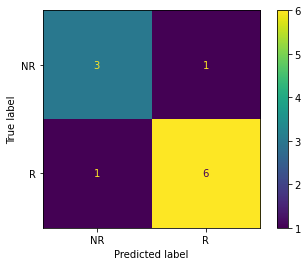

In [13]:
# Define the parameters grid to tune for model optimization

k_range = list(range(1, 21))
param_grid = {'n_neighbors': k_range, 
              'metric':['euclidean',
                        'cosine', 
                        'manhattan']}

# instantiate the classifier model object
knn = neighbors.KNeighborsClassifier()

# defining parameter range
clf = GridSearchCV(knn, param_grid, cv=10, scoring='f1')
clf.fit(XTrain,yTrain)

#Obtain in the variable model the best Decision Tree classifier
knn_finalmodel = clf.best_estimator_


# ---------------Cross-validation

# Calculate the Cross-validation error during the training step
scores = cross_validate(knn_finalmodel, XTrain, yTrain, cv=10, scoring=['f1', 'accuracy'])

knn_meanF1 = np.mean(scores['test_f1'])
knn_meanAcc = np.mean(scores['test_accuracy'])


print('Cross-Validation classification metrics: \n-------------------------')
print("F1 SCORE \n", scores['test_f1'].tolist())
print('Mean Validation Classification F1: ', knn_meanF1)
print("\nACCURACY\n", scores['test_accuracy'].tolist())
print('Mean Validation Classification Accuracy: ', knn_meanAcc, "\n")



#----------------Training with the best model

# Obtain the best k and calculate results on test set
k = clf.best_params_['n_neighbors']
met = clf.best_params_['metric']

# Instantiate model with the best parameters and train with final Training data
knn_finalmodel = neighbors.KNeighborsClassifier(n_neighbors = k, metric=met)
knn_finalmodel.fit(XTrain , yTrain)


#----------------Computing evaluation metrics

#This counters are used to obtain the accuracy "by hand"
contTrain = 0
contTest = 0

# Compute the TRAIN prediction according to the model
yhatTrain = knn_finalmodel.predict(XTrain)

# Check the result on the train examples
#print('Predicted value : ' + str(yhat) , ', real target : ' + str(yTrain))
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1
        

# Compute the TEST prediction according to the model
yhatTest = knn_finalmodel.predict(XTest)

# Check the result on the test examples
#print('Predicted value : ' + str(yhat) , ', real target : ' + str(yTest))
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1
        
        
# Save it in variables for later model assessment
knn_TrainAcc = contTrain/len(yTrain)
knn_TestAcc = contTest/len(yTest)
knn_TestErr = np.mean(yhatTest != yTest)

dictReport = classification_report(yTest,yhatTest, output_dict=True)
knn_precision_per_label = [dictReport['0']['precision'], dictReport['1']['precision']]
knn_recall_per_label = [dictReport['0']['recall'], dictReport['1']['recall']]
knn_support_per_label = [dictReport['0']['support'], dictReport['1']['support']]
knn_wF1= dictReport['weighted avg']['f1-score']
knn_wprecision= dictReport['weighted avg']['precision']
knn_wrecall= dictReport['weighted avg']['recall']

# Rest of reported evaluation metrics taken from sklearn.classification report 

knn_fm_evaluation = {'Val_avgF1' : knn_meanF1, 
                     'Val_avgAcc' : knn_meanAcc, 
                     'Best_param' : [k, met], 
                     "Train_Acc": knn_TrainAcc, 
                     "Test_Acc": knn_TestAcc,
                     "Test_Weighted_F1" : knn_wF1,
                    "Test_Weighted_precision": knn_wprecision, 
                    "Test_Weighted_recall": knn_wrecall, 
                    "Label_support" : knn_support_per_label,
                    "Precision_perLabel" : knn_precision_per_label,
                     "Recall_perLabel": knn_recall_per_label}


        
print("---------------- BEST MODEL HYPERPARAMETERS ------------------")
print("Best estimator found by grid search:")
print(knn_finalmodel)
print('Best K:', k)
print('Best distance metric : ', met)
print('\n\t Train accuracy: ', knn_TrainAcc)
print('\t Test accuracy: ', knn_TestAcc)
print('\t Test Error: ', knn_TestErr, "\n")
print(classification_report(yTest,yhatTest))
                     
#Print test confusion matrix
print('----------------Test Confusion Matrix------------------')
confmat_knn = confusion_matrix(yTest,yhatTest)
disp = ConfusionMatrixDisplay(confusion_matrix=confmat_knn,display_labels=le.classes_)
disp.plot()



    

The model prediction error outcome for a range of parameters can be supervised in many ways ( fetching errors for crossvalidation metrics for each model trained for each parameter grid point as done before, or in this case, plotting the validation errors with the increase of a parameter through plots). In this case, Cross validation metrics are lower than the training subset accuracy likely because of the small train subset used at the expense of a larger test subset that is more representative for the evaluation of the final model. It seems that model test prediction accuracy and f1 metrics are substantial and the final model is considered suitable for performing predictions of responsiveness in SNP patients. One must be cautious however when making this affirmations, as we are performing the predictions on a small test subset that may not represent the rest of the dataset. Widening the test sampling also comes at the expense of performing a less valid cross-validation, as this practice leaves less room for training. Another remark about our training is that the dataset used for it is scarce, and perhaps performing cross-validation for a higher number of data partitions is also a room of improvement.

## 2.2. Decision tree classifier (DTC)

The hyperparameters chosen to change the training model are the minimum samples each leaf (final node) can have, the depth of the tree which affects overfitting (as the depth increases it will take into account the min leaf number of samples to end the tree), the minimum splitting sample number to avoid splitting errors, and the criteria of measurement of information gain to measure the quality of the split.


Cross-Validation classification metrics: 
-------------------------
F1 SCORE 
 [0.6666666666666666, 0.8571428571428571, 0.8, 0.5, 0.8, 1.0, 0.5, 0.8, 0.8, 1.0]
Mean Validation Classification F1:  0.7723809523809524

ACCURACY
 [0.6, 0.8, 0.75, 0.5, 0.75, 1.0, 0.5, 0.75, 0.75, 1.0]
Mean Validation Classification Accuracy:  0.74 

---------------- BEST MODEL HYPERPARAMETERS ------------------
Best estimator found by grid search:
DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       random_state=0)
Best Params (min leaf samples, min split samples, depth, crit): (2, 10, 5, 'gini')

	 Train accuracy:  0.9047619047619048
	 Test accuracy:  0.7272727272727273
	 Test Error:  0.2727272727272727 

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.83      0.71      0.77         7

    accuracy                           0.73        11
   macro avg       0.72      0.73      0

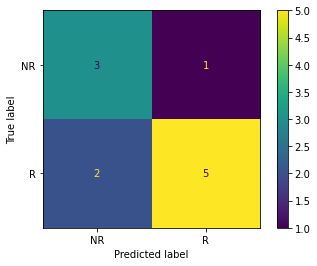

In [14]:
#Define parameters of the decision tree to be checked with cross-validation
param_grid = {'min_samples_leaf': [2, 5, 10],
              'min_samples_split': [2, 5, 10],
              'max_depth':[2, 5, 10, 100],
              'criterion':['entropy','gini']}

dtc=DecisionTreeClassifier(random_state=0)
# Create a gridsearch using the Decision Tree Classifier
clf = GridSearchCV(dtc, param_grid, cv=10, scoring='f1')

# Train the classifier using training dataset
clf.fit(XTrain , yTrain)


dtc_finalmodel = clf.best_estimator_

# ---------------Cross-validation

# Calculate the Cross-validation error during the training step
scores = cross_validate(dtc_finalmodel, XTrain, yTrain, cv=10, scoring=['f1', 'accuracy'])

dtc_meanF1 = np.mean(scores['test_f1'])
dtc_meanAcc = np.mean(scores['test_accuracy'])


print('Cross-Validation classification metrics: \n-------------------------')
print("F1 SCORE \n", scores['test_f1'].tolist())
print('Mean Validation Classification F1: ', dtc_meanF1)
print("\nACCURACY\n", scores['test_accuracy'].tolist())
print('Mean Validation Classification Accuracy: ', dtc_meanAcc, "\n")


#----------------Training with the best model

# Obtain the best k and calculate results on test set
sleaf = clf.best_params_['min_samples_leaf']
ssplit = clf.best_params_['min_samples_split']
depth = clf.best_params_['max_depth']
crit = clf.best_params_['criterion']


dtc_finalmodel = dtc_finalmodel.fit(XTrain, yTrain)

#----------------Computing evaluation metrics


#This counters are used to obtain the accuracy "by hand"
contTrain = 0
contTest = 0

# Compute the train prediction according to the model
yhatTrain = dtc_finalmodel.predict(XTrain)

# Check the result on the train examples
#print('Predicted value : ' + str(yhat) , ', real target : ' + str(yTrain))
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

# Compute the test prediction according to the model
yhatTest = dtc_finalmodel.predict(XTest)

# Check the result on the test examples
#print('Predictedvalue : ' + str(yhat) , ', real target : ' + str(yTest))
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1
     
        
# Save it in variables for later model assessment
dtc_TrainAcc = contTrain/len(yTrain)
dtc_TestAcc = contTest/len(yTest)
dtc_TestErr = np.mean(yhatTest != yTest)

dictReport = classification_report(yTest,yhatTest, output_dict=True)
dtc_precision_per_label = [dictReport['0']['precision'], dictReport['1']['precision']]
dtc_recall_per_label = [dictReport['0']['recall'], dictReport['1']['recall']]
dtc_support_per_label = [dictReport['0']['support'], dictReport['1']['support']]
dtc_wF1= dictReport['weighted avg']['f1-score']
dtc_wprecision= dictReport['weighted avg']['precision']
dtc_wrecall= dictReport['weighted avg']['recall']

# Rest of reported evaluation metrics taken from sklearn.classification report 

dtc_fm_evaluation = {'Val_avgF1' : dtc_meanF1, 
                     'Val_avgAcc' : dtc_meanAcc, 
                     'Best_param' : [sleaf, ssplit, depth, crit], 
                     "Train_Acc": dtc_TrainAcc, 
                     "Test_Acc": dtc_TestAcc,
                     "Test_Weighted_F1" : dtc_wF1,
                    "Test_Weighted_precision": dtc_wprecision, 
                    "Test_Weighted_recall": dtc_wrecall, 
                    "Label_support" : dtc_support_per_label,
                    "Precision_perLabel" : dtc_precision_per_label,
                     "Recall_perLabel": dtc_recall_per_label}


        
print("---------------- BEST MODEL HYPERPARAMETERS ------------------")
print("Best estimator found by grid search:")
print(dtc_finalmodel)
print('Best Params (min leaf samples, min split samples, depth, crit):', (sleaf, ssplit, depth, crit))
print('\n\t Train accuracy: ', dtc_TrainAcc)
print('\t Test accuracy: ', dtc_TestAcc)
print('\t Test Error: ', dtc_TestErr, "\n")
print(classification_report(yTest,yhatTest))
                     
#Print test confusion matrix
print('----------------Test Confusion Matrix------------------')
confmat_dtc = confusion_matrix(yTest,yhatTest)
disp = ConfusionMatrixDisplay(confusion_matrix=confmat_dtc,display_labels=le.classes_)
disp.plot()


Precision, Recall, F1 and accuracy metrics are lower than the last model.
The decision tree can be interpretable as a set of rules. These can be seen graphically in a tree structure.

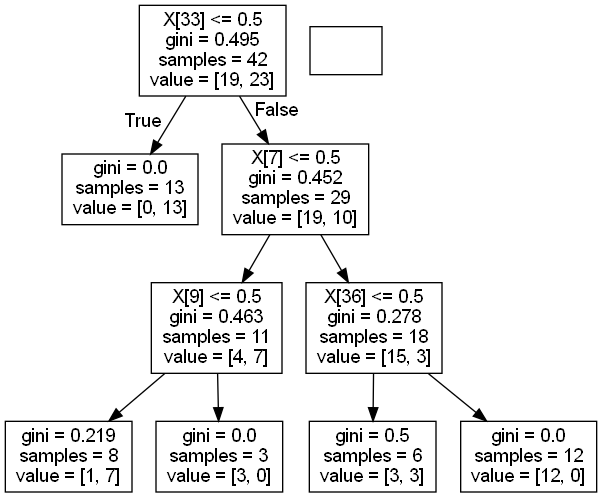

In [15]:
dot_data = export_graphviz(dtc_finalmodel)
graph = graph_from_dot_data(dot_data)
graph.write_png('./tree_dtc_Dataset9.png')
display.Image("./tree_dtc_Dataset9.png", width="700")

As a future improvement, a pruning can be undertaken for the tree as there are values in the first splitting that have a low gini splitting quality measurement

## 2.3. Random Forest Classifier (RFC)

A supervised ML  that incorporates random components-subsets of a training set. Its algorythm implies creating a forest of many trees (500 by default), sampling with replacement for each tree a subset and training different classifier with each subsets, then for each node it selects m features independent for each tree and takes them into account for a selection of the best models with those features. After this, it combines the the trees from all these components and predicts the classification for new data with a majority vote or average weighed vote.

This random subsetting method has the advantage over Decision Tree Classifiers that it avoids overfitting in a larger extent with the negative side that they are more computationally costly and less interpretable.

Cross-Validation classification metrics: 
-------------------------
F1 SCORE 
 [0.6666666666666666, 0.5714285714285715, 1.0, 0.8, 1.0, 1.0, 0.4, 0.8, 0.8, 1.0]
Mean Validation Classification F1:  0.8038095238095238

ACCURACY
 [0.6, 0.4, 1.0, 0.75, 1.0, 1.0, 0.25, 0.75, 0.75, 1.0]
Mean Validation Classification Accuracy:  0.75 

---------------- BEST MODEL HYPERPARAMETERS ------------------
Best estimator found by grid search:
RandomForestClassifier(bootstrap='false', max_depth=2, min_samples_leaf=5,
                       random_state=0)
Best Params (min leaf samples, min split samples, depth): (5, 2, 2)

	 Train accuracy:  0.8809523809523809
	 Test accuracy:  0.7272727272727273
	 Test Error:  0.2727272727272727 

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.75      0.86      0.80         7

    accuracy                           0.73        11
   macro avg       0.71      0.68      0.69        11
weig

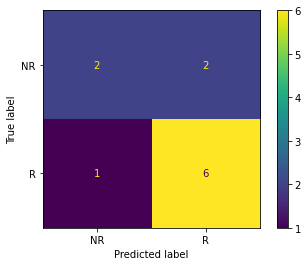

In [16]:
# Define parameters of the random forest to tune with gridsearcv
param_grid = {'min_samples_leaf': [2, 5, 10],
              'min_samples_split': [2, 5, 10],
             'max_depth':[2, 5, 10, 100]}

# Create a gridsearch using the Random Forest Classifier
rtc = RandomForestClassifier(random_state = 0, bootstrap='false')
clf = GridSearchCV(rtc, param_grid, cv=10, scoring='f1')

# Train the classifier using training dataset
clf.fit(XTrain , yTrain)

#----------------Training with the best model


rtc_finalmodel = clf.best_estimator_

# ---------------Cross-validation

# Calculate the Cross-validation error during the training step
scores = cross_validate(rtc_finalmodel, XTrain, yTrain, cv=10, scoring=['f1', 'accuracy'])

rtc_meanF1 = np.mean(scores['test_f1'])
rtc_meanAcc = np.mean(scores['test_accuracy'])

print('Cross-Validation classification metrics: \n-------------------------')
print("F1 SCORE \n", scores['test_f1'].tolist())
print('Mean Validation Classification F1: ', rtc_meanF1)
print("\nACCURACY\n", scores['test_accuracy'].tolist())
print('Mean Validation Classification Accuracy: ', rtc_meanAcc, "\n")


#----------------Training with the best model

# Obtain the best parameters and calculate results on test set
sleaf = clf.best_params_['min_samples_leaf']
ssplit = clf.best_params_['min_samples_split']
depth = clf.best_params_['max_depth']

# Instantiate model with the best parameters and train with final Training data
rtc_finalmodel = rtc_finalmodel.fit(XTrain, yTrain)


#----------------Computing evaluation metrics

#This counters are used to obtain the accuracy "by hand"
contTrain = 0
contTest = 0

# Compute the TRAIN prediction according to the model
yhatTrain = rtc_finalmodel.predict(XTrain)

# Check the result on the train examples
#print('Predicted value : ' + str(yhat) , ', real target : ' + str(yTrain))
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1
        

# Compute the TEST prediction according to the model
yhatTest = rtc_finalmodel.predict(XTest)

# Check the result on the test examples
#print('Predicted value : ' + str(yhat) , ', real target : ' + str(yTest))
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1
        
        
# Save it in variables for later model assessment
rtc_TrainAcc = contTrain/len(yTrain)
rtc_TestAcc = contTest/len(yTest)
rtc_TestErr = np.mean(yhatTest != yTest)

dictReport = classification_report(yTest,yhatTest, output_dict=True)
rtc_precision_per_label = [dictReport['0']['precision'], dictReport['1']['precision']]
rtc_recall_per_label = [dictReport['0']['recall'], dictReport['1']['recall']]
rtc_support_per_label = [dictReport['0']['support'], dictReport['1']['support']]
rtc_wF1= dictReport['weighted avg']['f1-score']
rtc_wprecision= dictReport['weighted avg']['precision']
rtc_wrecall= dictReport['weighted avg']['recall']

# Rest of reported evaluation metrics taken from sklearn.classification report 

rtc_fm_evaluation = {'Val_avgF1' : rtc_meanF1, 
                     'Val_avgAcc' : rtc_meanAcc, 
                     'Best_param' : [sleaf, ssplit, depth], 
                     "Train_Acc": rtc_TrainAcc, 
                     "Test_Acc": rtc_TestAcc,
                     "Test_Weighted_F1" : rtc_wF1,
                    "Test_Weighted_precision": rtc_wprecision, 
                    "Test_Weighted_recall": rtc_wrecall, 
                    "Label_support" : rtc_support_per_label,
                    "Precision_perLabel" : rtc_precision_per_label,
                     "Recall_perLabel": rtc_recall_per_label}


        
print("---------------- BEST MODEL HYPERPARAMETERS ------------------")
print("Best estimator found by grid search:")
print(rtc_finalmodel)
print('Best Params (min leaf samples, min split samples, depth):', (sleaf, ssplit, depth))
print('\n\t Train accuracy: ', rtc_TrainAcc)
print('\t Test accuracy: ', rtc_TestAcc)
print('\t Test Error: ', rtc_TestErr, "\n")
print(classification_report(yTest,yhatTest))
                     
#Print test confusion matrix
print('----------------Test Confusion Matrix------------------')
confmat_rtc = confusion_matrix(yTest,yhatTest)
disp = ConfusionMatrixDisplay(confusion_matrix=confmat_rtc,display_labels=le.classes_)
disp.plot()



    

## 2.4. Multi-Layer Perceptron (MLP) classifier

For the multilayer perceptron classifier, we consider another series of parameters

- **Defining the architecture of the network** is a decisive step for creating the MLP. We can define the number of hidden layers and nodes in every each one of the layers in this way. To increase the complexity (e.g. in training of multidimensional samples which more non-linear relationships), we can increase the number of nodes and or number of layers in the architecture (at the expense of heavier computation involved).
In this case we will define a multilayer perceptron and evaluate if the training will be better either with 150 hidden nodes, another one with 2 layers of (10,30)nodes or with 3 layers of [5,10,100] nodes

- **For the normalization of input and output** influence one can choose different activation functions. We consider a range of functions identity, sigmoid logistic, tanh, reLu functions. For instance, in the case of a neural network with a large number of hidden layers, it is recommended to use the non-linear function reLu to avoid the vanishing gradient problem derived from the large number of layers and hindered optimization.

- We consider the **numerical solvers** `lbfgs`and `sgd` as they are more suitable and can converge better for small datasets

- We can define the **maximum number of iterations** the training will follow with the `max_iter` parameter

Cross-Validation classification metrics: 
-------------------------
F1 SCORE 
 [0.8, 0.5714285714285715, 1.0, 1.0, 1.0, 0.0, 0.8, 1.0, 0.6666666666666666, 0.5]
Mean Validation Classification F1:  0.7338095238095238

ACCURACY
 [0.8, 0.4, 1.0, 1.0, 1.0, 0.5, 0.75, 1.0, 0.75, 0.5]
Mean Validation Classification Accuracy:  0.77 

---------------- BEST MODEL HYPERPARAMETERS ------------------
Best estimator found by grid search:
MLPClassifier(hidden_layer_sizes=(10, 30), max_iter=500, random_state=0,
              solver='sgd')
Best Params (max_iter, hidden_layer_sizes, activation, solver):  (500, (10, 30), 'relu', 'sgd')

	 Train accuracy:  0.8809523809523809
	 Test accuracy:  0.9090909090909091
	 Test Error:  0.09090909090909091 

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.88      1.00      0.93         7

    accuracy                           0.91        11
   macro avg       0.94      0.88      0.90 

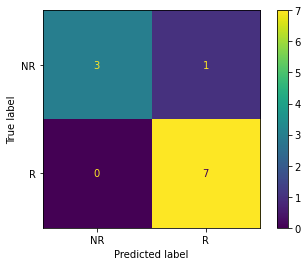

In [17]:
# Remove sklearn convergence warnings derived from the GridSearchCV
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

# Define parameters of the MLP to be checked with cross-validation
param_grid = {'max_iter': [500, 
                           1000, 
                           2000],
              'hidden_layer_sizes': [150,
                                     (10,30),
                                     (5,10,100)],
              'activation':['identity',
                            'logistic',
                            'relu', 
                            'tanh'],
              'solver': ['lbfgs', 'sgd']}


mlp = MLPClassifier(random_state=0)
# Create a gridsearch using the MLP Classifier
clf = GridSearchCV(mlp, param_grid, cv=10, scoring = 'f1')


# Train the classifier using training dataset
clf.fit(XTrain , yTrain)


#Obtain in the variable model the best MLP classifier
mlp_finalmodel = clf.best_estimator_


# ---------------Cross-validation

# Calculate the Cross-validation error during the training step
scores = cross_validate(mlp_finalmodel, XTrain, yTrain, cv=10, scoring=['f1', 'accuracy'])

mlp_meanF1 = np.mean(scores['test_f1'])
mlp_meanAcc = np.mean(scores['test_accuracy'])


print('Cross-Validation classification metrics: \n-------------------------')
print("F1 SCORE \n", scores['test_f1'].tolist())
print('Mean Validation Classification F1: ', mlp_meanF1)
print("\nACCURACY\n", scores['test_accuracy'].tolist())
print('Mean Validation Classification Accuracy: ', mlp_meanAcc, "\n")



#----------------Training with the best model

# Obtain the best parameters and calculate results on test set
maxiter = clf.best_params_['max_iter']
hidden_ls = clf.best_params_['hidden_layer_sizes']
actfunct = clf.best_params_['activation']
solv = clf.best_params_['solver']

# Instantiate model with the best parameters and train with final Training data

mlp_finalmodel = mlp_finalmodel.fit(XTrain, yTrain)


#----------------Computing evaluation metrics

#This counters are used to obtain the accuracy "by hand"
contTrain = 0
contTest = 0


# Compute the train prediction according to the model
yhatTrain = mlp_finalmodel.predict(XTrain)

# Check the result on the train examples
#print('Predicted value : ' + str(yhat) , ', real target : ' + str(yTrain))
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

# Compute the test prediction according to the model
yhatTest = mlp_finalmodel.predict(XTest)

# Check the result on the test examples
#print('Predicted value : ' + str(yhat) , ', real target : ' + str(yTest))
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1

        
# Save it in variables for later model assessment
mlp_TrainAcc = contTrain/len(yTrain)
mlp_TestAcc = contTest/len(yTest)
mlp_TestErr = np.mean(yhatTest != yTest)

dictReport = classification_report(yTest,yhatTest, output_dict=True)
mlp_precision_per_label = [dictReport['0']['precision'], dictReport['1']['precision']]
mlp_recall_per_label = [dictReport['0']['recall'], dictReport['1']['recall']]
mlp_support_per_label = [dictReport['0']['support'], dictReport['1']['support']]
mlp_wF1= dictReport['weighted avg']['f1-score']
mlp_wprecision= dictReport['weighted avg']['precision']
mlp_wrecall= dictReport['weighted avg']['recall']

# Rest of reported evaluation metrics taken from sklearn.classification report 

mlp_fm_evaluation = {'Val_avgF1' : mlp_meanF1, 
                     'Val_avgAcc' : mlp_meanAcc, 
                     'Best_param': (maxiter, hidden_ls, actfunct, solv), 
                     "Train_Acc": mlp_TrainAcc, 
                     "Test_Acc": mlp_TestAcc,
                     "Test_Weighted_F1" : mlp_wF1,
                    "Test_Weighted_precision": mlp_wprecision, 
                    "Test_Weighted_recall": mlp_wrecall, 
                    "Label_support" : mlp_support_per_label,
                    "Precision_perLabel" : mlp_precision_per_label,
                     "Recall_perLabel": mlp_recall_per_label}


        
print("---------------- BEST MODEL HYPERPARAMETERS ------------------")
print("Best estimator found by grid search:")
print(mlp_finalmodel)
print('Best Params (max_iter, hidden_layer_sizes, activation, solver): ', (maxiter, hidden_ls, actfunct, solv))

print('\n\t Train accuracy: ', mlp_TrainAcc)
print('\t Test accuracy: ', mlp_TestAcc)
print('\t Test Error: ', mlp_TestErr, "\n")
print(classification_report(yTest,yhatTest))
                     
#Print test confusion matrix
print('----------------Test Confusion Matrix------------------')
confmat_mlp = confusion_matrix(yTest,yhatTest)
disp = ConfusionMatrixDisplay(confusion_matrix=confmat_mlp,display_labels=le.classes_)
disp.plot()




## 5. Logistic regression (LogReg)

In this case, we will want to optimize a discriminative sigmoid classifier to learn to distinguish the classes through modelling probability distributions of classes or events existing and defines a decision boundary for prediction(in this case, Responsiveness R and NonResponsiveness NR).

For a multinomial logistic classifier in this case, a softmax function will be used to compute the probability distributions. The modelling of the probability distributions is done through the learning of weights w and biases b with the minimization of a Loss Function, a measurement metric of distance between predictions and the true observations. However, to avoid overfitting, a regularization term is added into the parameter estimate, which depends on a regularization strength and is the inverse of the parameter we propose for optimization , C. If C is large, the strength of the regulatization will be low and there can be overfitting, whereas if it is small, the strength will be much higher and will obstaculize the model from learning.


Cross-Validation classification metrics: 
-------------------------
F1 SCORE 
 [0.6666666666666666, 0.5714285714285715, 1.0, 1.0, 1.0, 0.6666666666666666, 0.0, 0.8, 0.4, 0.5]
Mean Validation Classification F1:  0.6604761904761905

ACCURACY
 [0.6, 0.4, 1.0, 1.0, 1.0, 0.75, 0.0, 0.75, 0.25, 0.5]
Mean Validation Classification Accuracy:  0.625 

---------------- BEST MODEL HYPERPARAMETERS ------------------
Best estimator found by grid search:
LogisticRegression(C=0.11018036072144288, max_iter=1000, random_state=0,
                   solver='liblinear')
Best_param C : 0.11018036072144288

	 Train accuracy:  0.8809523809523809
	 Test accuracy:  0.8181818181818182
	 Test Error:  0.18181818181818182 

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.86      0.86      0.86         7

    accuracy                           0.82        11
   macro avg       0.80      0.80      0.80        11
weighted avg       0.82

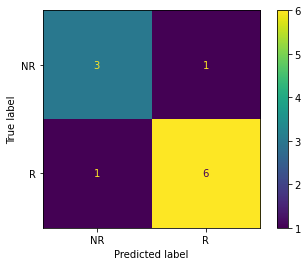

In [18]:
# Define the parameter ranges to tune with gridsearchcv

param_grid = {'C' : np.linspace(0.01,50, 500)}


logreg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=0)
# Create a gridsearch using the MLP Classifier
clf = GridSearchCV(logreg, param_grid, cv=10, scoring='f1')

# Train the classifier using training dataset
clf.fit(XTrain , yTrain)

#Obtain in the variable model the best logreg classifier
logreg_finalmodel = clf.best_estimator_

# ---------------Cross-validation

# Calculate the Cross-validation error during the training step
scores = cross_validate(logreg_finalmodel, XTrain, yTrain, cv=10, scoring=['f1', 'accuracy'])

logreg_meanF1 = np.mean(scores['test_f1'])
logreg_meanAcc = np.mean(scores['test_accuracy'])

print('Cross-Validation classification metrics: \n-------------------------')
print("F1 SCORE \n", scores['test_f1'].tolist())
print('Mean Validation Classification F1: ', logreg_meanF1)
print("\nACCURACY\n", scores['test_accuracy'].tolist())
print('Mean Validation Classification Accuracy: ', logreg_meanAcc, "\n")



#----------------Training with the best model

Copt = clf.best_params_['C']

logreg_finalmodel = logreg_finalmodel.fit(XTrain, yTrain)



#----------------Computing evaluation metrics


#This counters are used to obtain the accuracy "by hand"
contTrain = 0
contTest = 0

# Compute the train prediction according to the model
yhatTrain = logreg_finalmodel.predict(XTrain)

# Check the result on the train examples
#print('Predicted value : ' + str(yhat) , ', real target : ' + str(yTrain))
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1
        
# Compute the test prediction according to the model
yhatTest = logreg_finalmodel.predict(XTest)

# Check the result on the train examples
#print('Predicted value : ' + str(yhat) , ', real target : ' + str(yTrain))
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


        
# Save it in variables for later model assessment
logreg_TrainAcc = contTrain/len(yTrain)
logreg_TestAcc = contTest/len(yTest)
logreg_TestErr = np.mean(yhatTest != yTest)

dictReport = classification_report(yTest,yhatTest, output_dict=True)
logreg_precision_per_label = [dictReport['0']['precision'], dictReport['1']['precision']]
logreg_recall_per_label = [dictReport['0']['recall'], dictReport['1']['recall']]
logreg_support_per_label = [dictReport['0']['support'], dictReport['1']['support']]
logreg_wF1= dictReport['weighted avg']['f1-score']
logreg_wprecision= dictReport['weighted avg']['precision']
logreg_wrecall= dictReport['weighted avg']['recall']

# Rest of reported evaluation metrics taken from sklearn.classification report 

logreg_fm_evaluation = {'Val_avgF1' : logreg_meanF1, 
                     'Val_avgAcc' : logreg_meanAcc, 
                     'Best_param': Copt, 
                     "Train_Acc": logreg_TrainAcc, 
                     "Test_Acc": logreg_TestAcc,
                     "Test_Weighted_F1" : logreg_wF1,
                    "Test_Weighted_precision": logreg_wprecision, 
                    "Test_Weighted_recall": logreg_wrecall, 
                    "Label_support" : logreg_support_per_label,
                    "Precision_perLabel" : logreg_precision_per_label,
                     "Recall_perLabel": logreg_recall_per_label}


        
print("---------------- BEST MODEL HYPERPARAMETERS ------------------")
print("Best estimator found by grid search:")
print(logreg_finalmodel)
print('Best_param C :', Copt)
print('\n\t Train accuracy: ', logreg_TrainAcc)
print('\t Test accuracy: ', logreg_TestAcc)
print('\t Test Error: ', logreg_TestErr, "\n")
print(classification_report(yTest,yhatTest))
                     
#Print test confusion matrix
print('----------------Test Confusion Matrix------------------')
confmat_logreg = confusion_matrix(yTest,yhatTest)
disp = ConfusionMatrixDisplay(confusion_matrix=confmat_logreg,display_labels=le.classes_)
disp.plot()



This model has similar evaluation metric values across accuracy, f1, precision and recall values in the small dataset to those relating to the KNN model, probably because of the small dataset used for training

<a id='#Results'></a>

---

# 3. Model assessment

    This stage will focus on reformatting final metric dictionaries into tables for model comparison and for choosing the optimal model for the problem at hand. We will also justify and assess the evaluation metrics retrieved by each selected model.

##### A. Comparative Cross-Validation metrics

First we will check if the cross-validation of the model was not hindered by the train/test data splitting chosen for all models. We gathered average F1 scores and accuracies for this

In [19]:
knn_fm_cv_metrics = {k:v for k,v in knn_fm_evaluation.items() if k in ['Val_avgF1', 'Val_avgAcc']}
dtc_fm_cv_metrics = {k:v for k,v in dtc_fm_evaluation.items() if k in ['Val_avgF1', 'Val_avgAcc']}
rtc_fm_cv_metrics = {k:v for k,v in rtc_fm_evaluation.items() if k in ['Val_avgF1', 'Val_avgAcc']}
mlp_fm_cv_metrics = {k:v for k,v in mlp_fm_evaluation.items() if k in [ 'Val_avgF1', 'Val_avgAcc']}
logreg_fm_cv_metrics = {k:v for k,v in logreg_fm_evaluation.items() if k in ['Val_avgF1', 'Val_avgAcc']}


In [20]:
knn_cvmetrics = pd.DataFrame(knn_fm_cv_metrics, index=["KNN"])
dtc_cvmetrics = pd.DataFrame(dtc_fm_cv_metrics, index=["DTC"])
rtc_cvmetrics = pd.DataFrame(rtc_fm_cv_metrics, index=["RFC"])
mlp_cvmetrics = pd.DataFrame(mlp_fm_cv_metrics, index=["MLP"])
logreg_cvmetrics = pd.DataFrame(logreg_fm_cv_metrics, index=["LogReg"])

print('Hyperparameter optimization')
print('Best hparams')
print('KNN : ', knn_fm_evaluation['Best_param'])
print('DTC : ', dtc_fm_evaluation['Best_param'])
print('RFC : ', rtc_fm_evaluation['Best_param'])
print('MLP : ', mlp_fm_evaluation['Best_param'])
print('LogReg : ', logreg_fm_evaluation['Best_param'])

print('\nCross-validation\n')
global_cv_metrics = pd.concat((knn_cvmetrics,dtc_cvmetrics, rtc_cvmetrics, mlp_cvmetrics, logreg_cvmetrics), axis=0).transpose()
global_cv_metrics.style.background_gradient(cmap='PuBu', axis=1)


Hyperparameter optimization
Best hparams
KNN :  [12, 'euclidean']
DTC :  [2, 10, 5, 'gini']
RFC :  [5, 2, 2]
MLP :  (500, (10, 30), 'relu', 'sgd')
LogReg :  0.11018036072144288

Cross-validation



,KNN,DTC,RFC,MLP,LogReg
Val_avgF1,0.856667,0.772381,0.803810,0.733810,0.660476
Val_avgAcc,0.840000,0.740000,0.750000,0.770000,0.625000


The cross-validation was better for KNN suggesting that the other methods might have needed another k-fold for train-validation data splitting. Perhaps because of the small initial train dataset some methods were better at extrapolating their models trained from the small samples. The model with the lowest cross-validation evaluation metrics was the Logistic Regression, which had very heterogeneous validation scorings as we could see from its results in the above cells for both accuracy and F1.

Getting a larger amount of data or increasing the test proportion will give more realistic final model evaluation metrics, as long as the cross-validation process is not hindered by this subsequent reduction in training subset. As a suggestion, other more small larger number of K partitions partitions can be used if the dataset is small and sparce, and even a leave-one out crossvalidation can also be efficient for this case.

##### B. Global evaluation metrics of final models

Now we will evaluate the global evaluation metrics for the final models for all techniques, pertaining to :
- **Train accuracy values :** To confirm if there was not overfitting (*If we performed a proper cross validation before, this should not be a problem*)
- **Test Accuracy, Weighed F1, Weighed precision and Weighed recall :** Evaluation metrics of the final model with regards to the test subset. These are the values we should take into account to select the best model

Weighed evaluation metrics were chosen due to the slight change of frequency counts between R and NR labels

In [21]:
knn_fm_evaluation_metrics = {k:v for k,v in knn_fm_evaluation.items() if k not in ['Label_support','Precision_perLabel','Recall_perLabel', 'Best_param', 'Val_avgF1', 'Val_avgAcc']}
dtc_fm_evaluation_metrics = {k:v for k,v in dtc_fm_evaluation.items() if k not in ['Label_support','Precision_perLabel','Recall_perLabel', 'Best_param', 'Val_avgF1', 'Val_avgAcc']}
rtc_fm_evaluation_metrics = {k:v for k,v in rtc_fm_evaluation.items() if k not in ['Label_support','Precision_perLabel','Recall_perLabel', 'Best_param', 'Val_avgF1', 'Val_avgAcc']}
mlp_fm_evaluation_metrics = {k:v for k,v in mlp_fm_evaluation.items() if k not in ['Label_support','Precision_perLabel','Recall_perLabel', 'Best_param', 'Val_avgF1', 'Val_avgAcc']}
logreg_fm_evaluation_metrics = {k:v for k,v in logreg_fm_evaluation.items() if k not in ['Label_support','Precision_perLabel','Recall_perLabel', 'Best_param', 'Val_avgF1', 'Val_avgAcc']}


In [22]:
knn_evmetrics = pd.DataFrame(knn_fm_evaluation_metrics, index=["KNN"])
dtc_evmetrics = pd.DataFrame(dtc_fm_evaluation_metrics, index=["DTC"])
rtc_evmetrics = pd.DataFrame(rtc_fm_evaluation_metrics, index=["RFC"])
mlp_evmetrics = pd.DataFrame(mlp_fm_evaluation_metrics, index=["MLP"])
logreg_evmetrics = pd.DataFrame(logreg_fm_evaluation_metrics, index=["LogReg"])

global_ev_metrics = pd.concat((knn_evmetrics,dtc_evmetrics, rtc_evmetrics, mlp_evmetrics, logreg_evmetrics), axis=0).transpose()
global_ev_metrics.style.background_gradient(cmap='PuBu', axis=1)

,KNN,DTC,RFC,MLP,LogReg
Train_Acc,0.880952,0.904762,0.880952,0.880952,0.880952
Test_Acc,0.818182,0.727273,0.727273,0.909091,0.818182
Test_Weighted_F1,0.818182,0.731935,0.716883,0.905628,0.818182
Test_Weighted_precision,0.818182,0.748485,0.719697,0.920455,0.818182
Test_Weighted_recall,0.818182,0.727273,0.727273,0.909091,0.818182


The model with the best performance in terms of accuracy, f1, weighted precision and recall is the final model for the Multi-Layer Perceptron (MLP), followed by KNN and Logistic Regression. This is possibly because of the model better encapsulating high-dimensionality data with higher complexity.

It seems important to note that there might have been overfitting in the Decision Tree Classifier model, as the training accuracy is considerably higher than that of the testing model. This increase in Train accuracy is slighly less noticeable in RFC, possibly because of the random subsampling that avoids overfitting.

##### A. Comparative Per label metrics

Evaluation metrics specific to label predictions were gathered to check what label the model predicted better. These are gathered in the form of **precision** and **recall**, but **Label support**, or the frequency number of the categorical labels types in the testing dataset, is plotted as a reference of how much coverage there is of each label. 

*These support values should be the same for every model, as we used the same testing and training datasets*

In [23]:
knn_fm_perlabel_metrics = {k:v for k,v in knn_fm_evaluation.items() if k in ['Label_support','Precision_perLabel','Recall_perLabel']}
dtc_fm_perlabel_metrics = {k:v for k,v in dtc_fm_evaluation.items() if k in ['Label_support','Precision_perLabel','Recall_perLabel']}
rtc_fm_perlabel_metrics = {k:v for k,v in rtc_fm_evaluation.items() if k in ['Label_support','Precision_perLabel','Recall_perLabel']}
mlp_fm_perlabel_metrics = {k:v for k,v in mlp_fm_evaluation.items() if k in ['Label_support','Precision_perLabel','Recall_perLabel']}
logreg_fm_perlabel_metrics = {k:v for k,v in logreg_fm_evaluation.items() if k in ['Label_support','Precision_perLabel','Recall_perLabel']}

In [24]:
knn_plmetrics = pd.DataFrame(knn_fm_perlabel_metrics, index=["KNN_NR" , "KNN_R"])
dtc_plmetrics = pd.DataFrame(dtc_fm_perlabel_metrics, index=["DTC_NR", "DTC_R"])
rtc_plmetrics = pd.DataFrame(rtc_fm_perlabel_metrics, index=["RFC_NR", "RFC_R"])
mlp_plmetrics = pd.DataFrame(mlp_fm_perlabel_metrics, index=["MLP_NR", "MLP_R"])
logreg_plmetrics = pd.DataFrame(logreg_fm_perlabel_metrics, index=["LogReg_NR", "LogReg_R"])

global_pl_metrics = pd.concat((knn_plmetrics,dtc_plmetrics, rtc_plmetrics, mlp_plmetrics, logreg_plmetrics), axis=0).transpose()
global_pl_metrics.style.background_gradient(cmap='PuBu', axis=1)

,KNN_NR,KNN_R,DTC_NR,DTC_R,RFC_NR,RFC_R,MLP_NR,MLP_R,LogReg_NR,LogReg_R
Label_support,4.000000,7.000000,4.000000,7.000000,4.000000,7.000000,4.000000,7.000000,4.000000,7.000000
Precision_perLabel,0.750000,0.857143,0.600000,0.833333,0.666667,0.750000,1.000000,0.875000,0.750000,0.857143
Recall_perLabel,0.750000,0.857143,0.750000,0.714286,0.500000,0.857143,0.750000,1.000000,0.750000,0.857143


As expected, label support values are the same for every model. R types also are overrepresented compared to NR types, which is logical as there was more global frequency of R types in the dataset.

It seems that also due to this precision and recall values are consistently higher for R label predictions, except in the case of precision values for the NR label predicted by the MLP model, which has considerably more performance than the rest of the models.

In [25]:
#save to csv
global_ev_metrics.to_csv("Global_metrics.csv")
global_pl_metrics.to_csv("PerLabel_metrics.csv")
global_cv_metrics.to_csv("Crossval_metrics.csv")


<a id='#Conclusion'></a>

---
## Conclusions

The present work elucidated two conclusions from the results obtained by it:

* After deploying 5 types of supervised machine learning models, the final **Multi-Layer Perceptron MLP** model is the one that proved to have better performance **across F1, precision, recall and accuracy globally**, and competitive Precision and Recall metrics per label. This model was followed by K Nearest Neighbors, Logistic Regression, Decision Tree Classifier and Random Forest Classifier final models.

* It is important to note that MLP likely had more performance due to its ability to encapsulate high dimensionality data In addition, it was the model with the most parameters that were specified in the grid for optimization. 

* Thus, for **future lines of improvement, widening the hyperparameter grid range** to get the optimal model is proposed. In addition, the **work could determine the optimal data splitting and sampling methods** for both **train-test data splittings** and **cross-validation** for more accurate evaluations and model selection, respectively. A larger cohort of patients could be gathered by next studies to have bigger size samples as well. In this way, test data could be larger and have more representative prediction evaluation metrics for the training, and training could be performed with less partitions being less costly and having less variation.

---
## REFERENCES

- *Miroslav Kubar, “An Introduction to Machine Learning”, 2nd, Springer, 2017.*
- *Pedro Isasi e Inés M Galván Redes de Neuronas Artificiales Un enfoque Práctico Ed Pearson, 2004*
- *Chapter 5 Logistic Regression, Speech and Language Processing. Daniel Jurafsky & James H. Martin*
- *Fagny, M., Platig, J., Kuijjer, M. L., Lin, X., & Quackenbush, J. (2020). Nongenic cancer-risk SNPs affect oncogenes, tumour-suppressor genes, and immune function. British Journal of Cancer, 122(4), Article 4. https://doi.org/10.1038/s41416-019-0614-3*
- *Mármol, I., Sánchez-de-Diego, C., Pradilla Dieste, A., Cerrada, E., & Rodriguez Yoldi, M. J. (2017). Colorectal Carcinoma: A General Overview and Future Perspectives in Colorectal Cancer. International Journal of Molecular Sciences, 18(1), 197. https://doi.org/10.3390/ijms18010197*
- *Vignal, A., Milan, D., SanCristobal, M., & Eggen, A. (2002). A review on SNP and other types of molecular markers and their use in animal genetics. Genetics, Selection, Evolution : GSE, 34(3), 275–305. https://doi.org/10.1186/1297-9686-34-3-275*


